<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# IMPORT LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from kneed import KneeLocator

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_blobs

import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score, adjusted_rand_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline,Pipeline

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

from sklearn.utils import resample

### 1. Import the data

In [2]:
path = '../DATA/'
csv_file = 'ais.csv'
df = pd.read_csv(path+csv_file)

### 2. Do some EDA of relationships between features.

In [3]:
## Check Data

# About DF
print('df is a %s' % type(df))
print('df has %d rows and %d columns' % df.shape)
print('Basic Statistics about df%s' % ('_'*50))
print(df.describe())
print('')
print('Sample of df%s' % ('_'*50))
print(df.head())

df is a <class 'pandas.core.frame.DataFrame'>
df has 202 rows and 14 columns
Basic Statistics about df__________________________________________________
       Unnamed: 0         rcc         wcc          hc          hg        ferr  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean   101.500000    4.718614    7.108911   43.091584   14.566337   76.876238   
std     58.456537    0.457976    1.800337    3.662989    1.362451   47.501239   
min      1.000000    3.800000    3.300000   35.900000   11.600000    8.000000   
25%     51.250000    4.372500    5.900000   40.600000   13.500000   41.250000   
50%    101.500000    4.755000    6.850000   43.500000   14.700000   65.500000   
75%    151.750000    5.030000    8.275000   45.575000   15.575000   97.000000   
max    202.000000    6.720000   14.300000   59.700000   19.200000  234.000000   

              bmi         ssf      pcBfat         lbm          ht          wt  
count  202.000000  202.000000  202.00

In [4]:
df.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [5]:
df.dtypes

Unnamed: 0      int64
rcc           float64
wcc           float64
hc            float64
hg            float64
ferr            int64
bmi           float64
ssf           float64
pcBfat        float64
lbm           float64
ht            float64
wt            float64
sex            object
sport          object
dtype: object

In [6]:
df.describe()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,101.500000,4.718614,7.108911,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.007921
std,58.456537,0.457976,1.800337,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925199
min,1.000000,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000
25%,51.250000,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000
50%,101.500000,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000
75%,151.750000,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000
max,202.000000,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000


In [7]:
df.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

In [8]:
df.shape

(202, 14)

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [9]:
df.columns

Index(['Unnamed: 0', 'rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat',
       'lbm', 'ht', 'wt', 'sex', 'sport'],
      dtype='object')

In [10]:
# ANSWER
drop_columns = ['sex', 'sport']

X = df.drop(columns = drop_columns)
# y = df[['sex', 'sport']]

scaler = StandardScaler()

scaled_features = scaler.fit_transform(X)

In [11]:
scaled_features[:5]

array([[-1.72349742, -1.66056304,  0.21777075, -1.53030101, -1.6675583 ,
        -0.35616263, -0.83865224,  1.23375957,  1.01102742, -0.11916982,
         1.62671873,  0.2801934 ],
       [-1.70634819, -0.67553837,  0.66323597, -1.33872548, -1.37324045,
        -0.18732754, -0.80014809,  1.03982167,  1.26206048, -0.48502895,
         0.98822602, -0.04376463],
       [-1.68919896, -1.26655317, -1.17430808, -1.83134828, -2.18261453,
        -1.17923368, -0.38360321,  1.0952325 ,  1.03208181, -0.72970203,
        -0.23726805, -0.42531519],
       [-1.67204973, -1.33222148, -1.00725862, -1.58503688, -1.44681991,
        -0.16622316, -0.37660246,  1.76631919,  1.64427855, -0.59010798,
         0.50420735, -0.00776929],
       [-1.65490051, -0.58798062, -0.17201132, -0.43558369, -0.41670745,
        -1.01039859, -1.39871258,  0.34718632,  0.66929855, -0.89537409,
         0.46301428, -0.74927322]])

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [12]:
kmeans = KMeans(
        init = 'random',
        n_clusters = 3,
        n_init = 10,
        max_iter = 300,
        random_state = 42
)

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

### 5. Get the labels for the models

In [13]:
kmeans.labels_[:5]

array([1, 1, 1, 1, 1])

In [14]:
# ANSWER

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [15]:
# ANSWER
kmeans_kwargs = {
    'init': 'random',
    'n_init' : 10,
    'max_iter': 300,
    'random_state' : 42
}

# A list holds the SSE values for each k
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, ** kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)


C:\Users\darry\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
sse

[2424.0,
 1498.569290949635,
 1260.6653284606293,
 1098.4484013309545,
 1018.5181697004773,
 947.8510113527702,
 894.5000841770899,
 840.2070379390318,
 784.4975528814139,
 755.9410254679109]

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

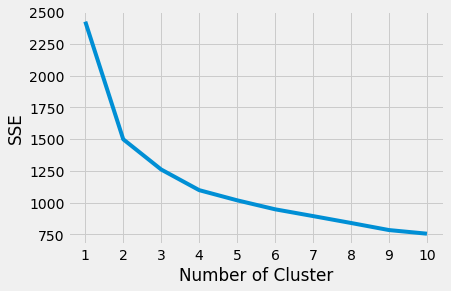

In [17]:
# ANSWER

plt.style.use('fivethirtyeight')
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()

### 7. Plot `ht` vs. `wt` using the clusters from each model.

- Plot ht, wt using hue sex
- Plot ht, wt using hue label

Each time, compare to the actual species classification.

In [18]:
# ANSWER

label = kmeans.fit_predict(X)

print(label)

[9 9 9 9 9 9 9 9 9 9 6 9 9 9 9 9 9 9 9 9 9 9 0 9 0 9 9 0 0 0 0 9 9 9 9 1 0
 9 9 0 9 0 6 0 0 0 0 0 6 0 6 0 6 1 6 6 1 0 0 1 0 9 1 1 1 4 4 1 1 7 0 6 0 0
 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 7 1 4 4 1 1 1 1 1 4 8 4 4 8 7 4 8 4 7
 4 7 4 8 4 4 7 4 4 4 7 4 8 4 8 8 4 8 4 4 8 8 8 8 8 8 8 8 8 4 8 8 8 8 3 8 5
 5 5 5 5 5 5 7 5 5 5 5 3 5 2 3 2 3 5 5 5 5 5 2 5 5 2 2 5 2 3 2 5 5 3 2 3 3
 2 3 5 3 3 5 3 5 3 2 3 5 3 5 3 2 5]


Text(0.5, 1.0, 'Height vs Weight by Sex')

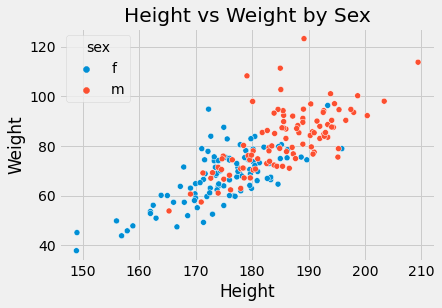

In [19]:
sns.scatterplot(x = 'ht', y = 'wt', data = X, hue = df.sex)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight by Sex')

Text(0.5, 1.0, 'Height vs Weight by Label')

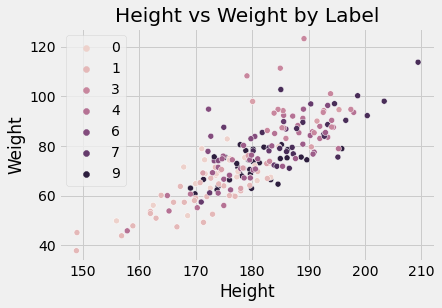

In [20]:
sns.scatterplot(x = 'ht', y = 'wt', data = X, hue = label)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight by Label')



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



